In [89]:
import numpy as np
import pandas as pd
import re
import os
import numpy as np
import matplotlib.pyplot as plt

from src.data.get_historical_tweets import *

%reload_ext autoreload
%autoreload 1

In [2]:
test()

getting tweets before 1127522225224146948
...400 tweets downloaded so far
getting tweets before 1124672389416144904
...598 tweets downloaded so far
getting tweets before 1121095181690974207
...798 tweets downloaded so far
getting tweets before 1116699102438461441
...998 tweets downloaded so far
getting tweets before 1110242521400123393
...1198 tweets downloaded so far
getting tweets before 1104714098724519935
...1398 tweets downloaded so far
getting tweets before 1098948459405721599
...1598 tweets downloaded so far
getting tweets before 1090459824196907007
...1798 tweets downloaded so far
getting tweets before 1084644517238714368
...1998 tweets downloaded so far
getting tweets before 1076844349860823041
...2198 tweets downloaded so far
getting tweets before 1069613383622803455
...2397 tweets downloaded so far
getting tweets before 1060949297900834815
...2597 tweets downloaded so far
getting tweets before 1056181643810168831
...2796 tweets downloaded so far
getting tweets before 1050436

In [5]:
amzn_og = pd.read_csv('./AMZN.csv')

In [40]:
amzn = amzn_og.copy()

In [41]:
amzn.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600
1,2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000
2,2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000
3,2017-05-26,995.000000,998.650024,989.250000,995.780029,995.780029,3469200
4,2017-05-30,996.510010,1001.200012,995.520020,996.700012,996.700012,3263100


In [42]:
amzn.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,503.0,1.475967e+03,3.353957e+02,9.400000e+02,1.130135e+03,1.575990e+03,1.738260e+03,2.038110e+03
High,503.0,1.490664e+03,3.393700e+02,9.486300e+02,1.139350e+03,1.588500e+03,1.758095e+03,2.050500e+03
Low,503.0,1.457952e+03,3.305736e+02,9.270000e+02,1.125275e+03,1.559080e+03,1.712265e+03,2.013000e+03
Close,503.0,1.475094e+03,3.349681e+02,9.386000e+02,1.135395e+03,1.576120e+03,1.740585e+03,2.039510e+03
Adj Close,503.0,1.475094e+03,3.349681e+02,9.386000e+02,1.135395e+03,1.576120e+03,1.740585e+03,2.039510e+03
Volume,503.0,4.850894e+06,2.390832e+06,1.585100e+06,3.136700e+06,4.204400e+06,5.892200e+06,1.656500e+07


In [43]:
amzn

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600
1,2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000
2,2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000
3,2017-05-26,995.000000,998.650024,989.250000,995.780029,995.780029,3469200
4,2017-05-30,996.510010,1001.200012,995.520020,996.700012,996.700012,3263100
5,2017-05-31,1000.000000,1000.119995,982.159973,994.619995,994.619995,3913100
6,2017-06-01,998.590027,998.989990,991.369995,995.950012,995.950012,2454800
7,2017-06-02,998.989990,1008.479980,995.669983,1006.729980,1006.729980,3752300
8,2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,1011.340027,2719900
9,2017-06-06,1012.000000,1016.500000,1001.250000,1003.000000,1003.000000,3346400


In [44]:
amzn['Change'] = [amzn.Close[i-1] - amzn.Close[i] for i in range(1,len(amzn.Close))] + [np.nan]

In [45]:
amzn.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Change
498,2019-05-16,1885.939941,1917.510010,1882.290039,1907.569946,1907.569946,4707800,38.569946
499,2019-05-17,1893.050049,1910.530029,1867.329956,1869.000000,1869.000000,4736600,10.030029
500,2019-05-20,1852.689941,1867.780029,1835.540039,1858.969971,1858.969971,3798200,1.449951
501,2019-05-21,1874.790039,1879.000000,1846.000000,1857.520020,1857.520020,4005100,-2.160034
502,2019-05-22,1851.780029,1871.489990,1851.000000,1859.680054,1859.680054,2931800,NaN


In [46]:
amzn['Pct_Change'] = [amzn.Change[i-1] / amzn.Close[i] for i in range(1,len(amzn.Close))] + [np.nan]

In [47]:
amzn[amzn.Change.isna() == True]

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change
502,2019-05-22,1851.780029,1871.48999,1851.0,1859.680054,1859.680054,2931800,NaN,NaN


In [35]:
#amzn = amzn.drop(index = 502)

In [48]:
amzn['Abs_Change'] = amzn.Change.abs()
amzn['Abs_Pct_Change'] = amzn.Pct_Change.abs()


In [49]:
amzn.describe()

,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change
count,503.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,502.000000,502.000000,502.000000,502.000000
mean,1475.967455,1490.663599,1457.951691,1475.094135,1475.094135,4.850894e+06,-1.769203,-0.001103,20.066332,0.013287
std,335.395722,339.370035,330.573624,334.968057,334.968057,2.390832e+06,30.078577,0.019462,22.458756,0.014251
min,940.000000,948.630005,927.000000,938.599976,938.599976,1.585100e+06,-128.519958,-0.116736,0.000000,0.000000
25%,1130.135010,1139.350036,1125.275024,1135.394959,1135.394959,3.136700e+06,-15.272430,-0.011068,5.484985,0.003842
50%,1575.989990,1588.500000,1559.079956,1576.119995,1576.119995,4.204400e+06,-2.399963,-0.001578,12.339996,0.009139
75%,1738.260009,1758.094971,1712.265014,1740.585022,1740.585022,5.892200e+06,9.610016,0.006499,25.942520,0.016506
max,2038.109985,2050.500000,2013.000000,2039.510010,2039.510010,1.656500e+07,139.359985,0.084830,139.359985,0.116736


In [51]:
amzn[amzn.Date == '2017-08-16']

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change
59,2017-08-16,981.650024,986.460022,973.219971,978.179993,978.179993,3132100,17.609986,0.018333,17.609986,0.018333


In [53]:
amzn.loc[57:62,:]

,Date,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change
57,2017-08-14,978.409973,985.500000,976.190002,983.299988,983.299988,3042800,0.559998,0.000570,0.559998,0.000570
58,2017-08-15,988.900024,991.739990,982.000000,982.739990,982.739990,2549300,4.559997,0.004662,4.559997,0.004662
59,2017-08-16,981.650024,986.460022,973.219971,978.179993,978.179993,3132100,17.609986,0.018333,17.609986,0.018333
60,2017-08-17,977.840027,977.840027,960.320007,960.570007,960.570007,3512400,2.100036,0.002191,2.100036,0.002191
61,2017-08-18,961.400024,965.429993,954.650024,958.469971,958.469971,3284800,5.179993,0.005434,5.179993,0.005434
62,2017-08-21,957.570007,961.200012,945.460022,953.289978,953.289978,3164500,-13.610046,-0.014076,13.610046,0.014076


In [64]:
amzn.dtypes

Date              datetime64[ns]
Open                     float64
High                     float64
Low                      float64
Close                    float64
Adj Close                float64
Volume                     int64
Change                   float64
Pct_Change               float64
Abs_Change               float64
Abs_Pct_Change           float64
dtype: object

In [61]:
amzn.Date = pd.to_datetime(amzn.Date, unit='D')

In [62]:
dt_amzn = amzn.set_index('Date')

In [63]:
dt_amzn

,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change
Date,,,,,,,,,,
2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600,-8.809998,-0.008987,8.809998,0.008987
2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000,-13.030029,-0.013117,13.030029,0.013117
2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000,-2.400024,-0.002410,2.400024,0.002410
2017-05-26,995.000000,998.650024,989.250000,995.780029,995.780029,3469200,-0.919983,-0.000923,0.919983,0.000923
2017-05-30,996.510010,1001.200012,995.520020,996.700012,996.700012,3263100,2.080017,0.002091,2.080017,0.002091
2017-05-31,1000.000000,1000.119995,982.159973,994.619995,994.619995,3913100,-1.330017,-0.001335,1.330017,0.001335
2017-06-01,998.590027,998.989990,991.369995,995.950012,995.950012,2454800,-10.779968,-0.010708,10.779968,0.010708
2017-06-02,998.989990,1008.479980,995.669983,1006.729980,1006.729980,3752300,-4.610047,-0.004558,4.610047,0.004558
2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,1011.340027,2719900,8.340027,0.008315,8.340027,0.008315


In [67]:
#2 Day Average Change is the average of 2 days of change. (i.e. monday to tuesday and tuesday to wednesday)

In [69]:
dt_amzn['2_Day_Avg_Change'] = dt_amzn.Change.rolling(2).mean()

In [70]:
dt_amzn['2_Day_Avg_Change']

Date
2017-05-23          NaN
2017-05-24   -10.920014
2017-05-25    -7.715026
2017-05-26    -1.660003
2017-05-30     0.580017
2017-05-31     0.375000
2017-06-01    -6.054993
2017-06-02    -7.695008
2017-06-05     1.864990
2017-06-06     0.635010
2017-06-07    -3.635010
2017-06-08    15.880004
2017-06-09    22.680023
2017-06-12    -1.239990
2017-06-13    -5.779999
2017-06-14     8.309997
2017-06-15    -5.620025
2017-06-16   -15.500000
2017-06-19    -2.440002
2017-06-20    -3.529999
2017-06-21    -4.354981
2017-06-22    -0.755005
2017-06-23     3.660004
2017-06-26    13.479981
2017-06-27     1.824982
2017-06-28     0.425018
2017-06-29    11.165008
2017-06-30    11.135010
2017-07-03    -1.700012
2017-07-05    -5.740021
                ...    
2019-04-10    -4.114990
2019-04-11     2.134948
2019-04-12    -0.400024
2019-04-15    -9.989990
2019-04-16    -9.974976
2019-04-17     0.675049
2019-04-18   -11.245056
2019-04-22   -31.040039
2019-04-23    -7.219971
2019-04-24    10.760010
2019-04-25 

In [ ]:
dt_amzn[(dt_amzn.index.month == 7) & (dt_amzn.index.year == 2018)]

In [79]:
dt_amzn['2_Day_Pct_Change'] = dt_amzn.Close.pct_change(periods = 2) #percent change two days later

In [80]:
dt_amzn

,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change,2_Day_Avg_Change,2_Day_Pct_Change
Date,,,,,,,,,,,,
2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600,-8.809998,-0.008987,8.809998,0.008987,NaN,NaN
2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000,-13.030029,-0.013117,13.030029,0.013117,-10.920014,NaN
2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000,-2.400024,-0.002410,2.400024,0.002410,-7.715026,0.022480
2017-05-26,995.000000,998.650024,989.250000,995.780029,995.780029,3469200,-0.919983,-0.000923,0.919983,0.000923,-1.660003,0.015739
2017-05-30,996.510010,1001.200012,995.520020,996.700012,996.700012,3263100,2.080017,0.002091,2.080017,0.002091,0.580017,0.003342
2017-05-31,1000.000000,1000.119995,982.159973,994.619995,994.619995,3913100,-1.330017,-0.001335,1.330017,0.001335,0.375000,-0.001165
2017-06-01,998.590027,998.989990,991.369995,995.950012,995.950012,2454800,-10.779968,-0.010708,10.779968,0.010708,-6.054993,-0.000752
2017-06-02,998.989990,1008.479980,995.669983,1006.729980,1006.729980,3752300,-4.610047,-0.004558,4.610047,0.004558,-7.695008,0.012175
2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,1011.340027,2719900,8.340027,0.008315,8.340027,0.008315,1.864990,0.015453


In [81]:
dt_amzn['2_Day_Avg_Pct_Change'] = dt_amzn['2_Day_Pct_Change'] / 2 #avg daily percent change two days later

In [82]:
dt_amzn

,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change,2_Day_Avg_Change,2_Day_Pct_Change,2_Day_Avg_Pct_Change
Date,,,,,,,,,,,,,
2017-05-23,975.020020,975.200012,966.849976,971.539978,971.539978,2415600,-8.809998,-0.008987,8.809998,0.008987,NaN,NaN,NaN
2017-05-24,976.000000,981.000000,970.229980,980.349976,980.349976,2446000,-13.030029,-0.013117,13.030029,0.013117,-10.920014,NaN,NaN
2017-05-25,984.849976,999.000000,982.109985,993.380005,993.380005,4822000,-2.400024,-0.002410,2.400024,0.002410,-7.715026,0.022480,0.011240
2017-05-26,995.000000,998.650024,989.250000,995.780029,995.780029,3469200,-0.919983,-0.000923,0.919983,0.000923,-1.660003,0.015739,0.007870
2017-05-30,996.510010,1001.200012,995.520020,996.700012,996.700012,3263100,2.080017,0.002091,2.080017,0.002091,0.580017,0.003342,0.001671
2017-05-31,1000.000000,1000.119995,982.159973,994.619995,994.619995,3913100,-1.330017,-0.001335,1.330017,0.001335,0.375000,-0.001165,-0.000582
2017-06-01,998.590027,998.989990,991.369995,995.950012,995.950012,2454800,-10.779968,-0.010708,10.779968,0.010708,-6.054993,-0.000752,-0.000376
2017-06-02,998.989990,1008.479980,995.669983,1006.729980,1006.729980,3752300,-4.610047,-0.004558,4.610047,0.004558,-7.695008,0.012175,0.006088
2017-06-05,1007.229980,1013.210022,1003.510010,1011.340027,1011.340027,2719900,8.340027,0.008315,8.340027,0.008315,1.864990,0.015453,0.007726


In [84]:
dt_amzn.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,503.0,1.475967e+03,3.353957e+02,9.400000e+02,1.130135e+03,1.575990e+03,1.738260e+03,2.038110e+03
High,503.0,1.490664e+03,3.393700e+02,9.486300e+02,1.139350e+03,1.588500e+03,1.758095e+03,2.050500e+03
Low,503.0,1.457952e+03,3.305736e+02,9.270000e+02,1.125275e+03,1.559080e+03,1.712265e+03,2.013000e+03
Close,503.0,1.475094e+03,3.349681e+02,9.386000e+02,1.135395e+03,1.576120e+03,1.740585e+03,2.039510e+03
Adj Close,503.0,1.475094e+03,3.349681e+02,9.386000e+02,1.135395e+03,1.576120e+03,1.740585e+03,2.039510e+03
Volume,503.0,4.850894e+06,2.390832e+06,1.585100e+06,3.136700e+06,4.204400e+06,5.892200e+06,1.656500e+07
Change,502.0,-1.769203e+00,3.007858e+01,-1.285200e+02,-1.527243e+01,-2.399963e+00,9.610016e+00,1.393600e+02
Pct_Change,502.0,-1.103060e-03,1.946159e-02,-1.167355e-01,-1.106806e-02,-1.577891e-03,6.498942e-03,8.483025e-02
Abs_Change,502.0,2.006633e+01,2.245876e+01,0.000000e+00,5.484985e+00,1.234000e+01,2.594252e+01,1.393600e+02
Abs_Pct_Change,502.0,1.328696e-02,1.425051e-02,0.000000e+00,3.841639e-03,9.139455e-03,1.650617e-02,1.167355e-01


In [88]:
july18_amzn = dt_amzn[(dt_amzn.index.month == 7) & (dt_amzn.index.year == 2018)]

In [90]:
july18_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,Change,Pct_Change,Abs_Change,Abs_Pct_Change,2_Day_Avg_Change,2_Day_Pct_Change,2_Day_Avg_Pct_Change
Date,,,,,,,,,,,,,
2018-07-02,1682.699951,1713.890015,1678.060059,1713.780029,1713.780029,3185700,19.820068,0.011700,19.820068,0.011700,2.920044,0.007247,0.003623
2018-07-03,1723.959961,1725.000000,1692.479980,1693.959961,1693.959961,2177300,-5.770019,-0.003395,5.770019,0.003395,7.025024,-0.003436,-0.001718
2018-07-05,1705.380005,1710.689941,1682.150024,1699.729980,1699.729980,2983100,-10.900025,-0.006372,10.900025,0.006372,-8.335022,-0.008198,-0.004099
2018-07-06,1696.000000,1715.270020,1691.670044,1710.630005,1710.630005,2650300,-28.390015,-0.016325,28.390015,0.016325,-19.645020,0.009841,0.004920
2018-07-09,1724.050049,1739.560059,1716.229980,1739.020020,1739.020020,3012000,-4.049926,-0.002323,4.049926,0.002323,-16.219971,0.023115,0.011558


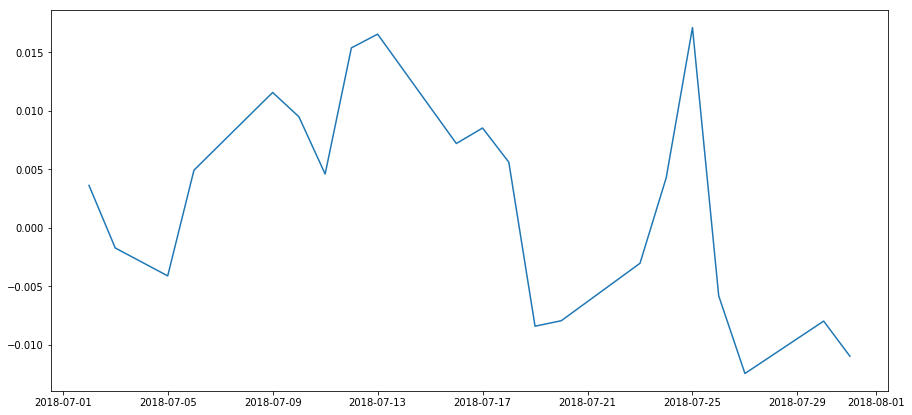

In [100]:
plt.figure(figsize=(15,7))
plt.plot(july18_amzn['2_Day_Avg_Pct_Change'])

In [101]:
summer18_amzn = dt_amzn[(dt_amzn.index.month >= 6) & (dt_amzn.index.month < 9) & (dt_amzn.index.year == 2018)]

In [108]:
jun_aug18_amzn = dt_amzn[(dt_amzn.index.month >= 5) & (dt_amzn.index.month < 9) & (dt_amzn.index.year == 2018)]

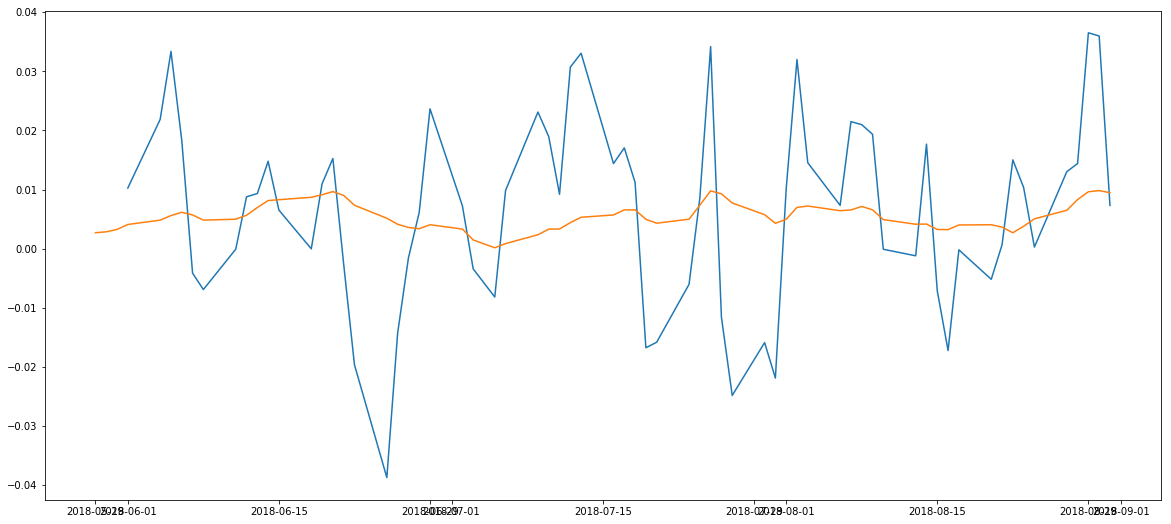

In [117]:
plt.figure(figsize=(20,9))
plt.plot(summer18_amzn['2_Day_Pct_Change'])
plt.plot(jun_aug18_amzn['2_Day_Pct_Change'].rolling(20).mean())
#plt.plot(jun_aug18_amzn['2_Day_Pct_Change'].rolling(15).mean())

In [ ]:
#build a function to do all this for k specified days
#should note down dates where its generally accepted that trump tweets had an effect on amazon stock
#reorganize/consolidate this code into the "Clean Notebook" with markdown notes